In [1]:
import numpy as np

In [2]:
### 데이터 생성하기

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
## 훈련데이터 / 테스트데이터 세트 생성하기
train_input, test_input, train_target, test_target = train_test_split(
                    perch_length, perch_weight, random_state=42)

In [5]:
# 1차원 데이터를 특정 행령의 2차원으로 재생성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보시면 됩니다.
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 1이 됩니다.
# 전체 갯수를 모를 때는 -1 값을 사용하면 전체 행의 갯수를 체크합니다.
train_input = train_input.reshape(-1, 1)
test_input  = test_input.reshape(-1, 1)

In [6]:
print(train_input.shape, test_input.shape)
print(train_input)
print("---------------")
print(test_input)


(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
---------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [13]:
from sklearn.neighbors import KNeighborsRegressor

### 클래스(모델) 이름 : KNeighborsRegressor()
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [14]:
### 훈련데이터 학습시키기 : 훈련모델 생성하기
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
### 예측데이터 : 50
knr.predict([[100]])

array([1033.33333333])

In [20]:
### - 산점도로 시각화 : 훈련데이터와 예측데이터, 이웃데이터 포함
import matplotlib.pyplot as plt

In [21]:
### 이웃 데이터 추출하기
distances, indexes = knr.kneighbors([[50]])
indexes

array([[34,  8, 14]], dtype=int64)

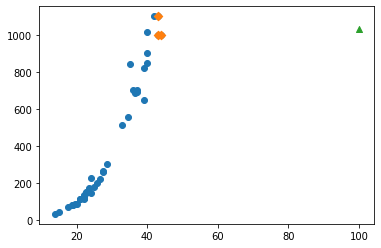

In [22]:
### 산점도 시각화하기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(100, 1033, marker="^")
plt.show()

## 선형회귀(Linear Regression)
##### - 많이 사용되는 대표적인 회귀 알고리즘
##### - 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행시 초반에 주로 진행합니다.
##### - 선형회귀의 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
##### - 직선을 "추세선" 이라고 합니다.
##### - 선형회귀 알고리즘 : 1차 방정식 (y = ax + b)
##### - 선형회귀 클래스(모델) : LinearRegresin
##### - 사용되는 패키지 : sklearn.linear_model